# Import Libraries

In [643]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time 
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)
import scipy.stats
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from catboost import CatBoostClassifier
from sklearn.linear_model import BayesianRidge, Ridge
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import optuna
#from xgboost import XGBRegressor
#from pycaret.regression import setup, compare_models, models
from scipy import stats
from scipy.stats import boxcox
from scipy.special import boxcox1p
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Load the data

In [644]:
df_train = pd.read_csv('Ames_Housing_Price_Data.csv',index_col=0)

In [645]:
df_raw=df_train.copy()

## Examine the data

In [646]:
df_train.shape

(2580, 81)

In [647]:
df_train.head(10)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
6,908128060,1922,198500,85,RL,64.0,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
7,902135020,936,93000,20,RM,60.0,6000,Pave,Pave,Reg,Bnk,AllPub,Inside,Mod,OldTown,Norm,Norm,2fmCon,1Story,4,4,1953,1953,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,TA,N,SBrkr,936,0,0,0.0,0.0,1,0,2,1,TA,4,Min2,0,NaN,Detchd,1974.0,Unf,2.0,576.0,TA,TA,Y,0,32,112,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
8,528228540,1246,187687,20,RL,53.0,3710,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,WdShing,Wd Shng,BrkFace,20.0,Gd,TA,PConc,Gd,TA,Gd,Unf,0.0,Unf,0.0,1146.0,1146.0,GasA,Ex,Y,SBrkr,1246,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2007.0,Fin,2.0,428.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,3,2008,New,Partial
9,923426010,889,137500,20,RL,74.0,12395,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,6,1984,1984,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,647.0,Unf,0.0,217.0,864.0,GasA,TA,Y,SBrkr,889,0,0,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1984.0,Unf,2.0,484.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
10,

In [648]:
#Check the number of NAs in each column
df_train.isna().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF  

# Data Cleaning/Preprocessing

In [649]:
target=df_train.SalePrice

In [650]:
test_ids=df_train.PID

In [651]:
df_train=df_train.drop(columns=['PID', 'SalePrice'])

In [652]:
df_train_copy=df_train.copy()

### Use .info() to see length and dtypes

In [653]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   MSSubClass     2580 non-null   int64  
 2   MSZoning       2580 non-null   object 
 3   LotFrontage    2118 non-null   float64
 4   LotArea        2580 non-null   int64  
 5   Street         2580 non-null   object 
 6   Alley          168 non-null    object 
 7   LotShape       2580 non-null   object 
 8   LandContour    2580 non-null   object 
 9   Utilities      2580 non-null   object 
 10  LotConfig      2580 non-null   object 
 11  LandSlope      2580 non-null   object 
 12  Neighborhood   2580 non-null   object 
 13  Condition1     2580 non-null   object 
 14  Condition2     2580 non-null   object 
 15  BldgType       2580 non-null   object 
 16  HouseStyle     2580 non-null   object 
 17  OverallQual    2580 non-null   int64  
 18  OverallCo

## Identify numerical and categorical variables

In [654]:
cols_list=list(df_train.columns)
cols_list

['GrLivArea',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [655]:
#MSSUBClass is actually a categoical data coluumn per the data descrpition text file
df_train.MSSubClass=df_train.MSSubClass.astype(str)

In [656]:
#looking at columns that consist of numberic values only
df_train.select_dtypes("number")
#df_train._get_numeric_data()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,856,NaN,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
2,1049,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
3,1001,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007
4,1039,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009
5,1665,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,NaN,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5,2009
760,1733,NaN,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,6,2009
761,2002,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007
762,1842,NaN,8826,7,5,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,486.0,193,96,0,0,0,0,0,7,2007


# (Moved to later) Remove features based on correlation to avoid multicollinearity 

In [657]:
#corr=df_train.corr()
#plt.figure(figsize = (16, 16))
#sns.heatmap(corr,
#           xticklabels=corr.columns.values,
#           yticklabels=corr.columns.values, cmap="Blues")

#plt.title('Heatmap of Correlation Matrix')
#corr

In [658]:
#high_corr_pairs = np.where(abs(corr) > 0.7)
#high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs)
                                        #if x != y and x < y]
#high_corr_pairs

### Per the data description, 
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

TotalBsmtSF=BsmtFinSF1+BsmtFinSF2+BsmtUnfSF

GrLivArea=1stFlrSF+2ndFlrSF+LowQualFinSF

In [659]:
#Dropping numerical columns of which have high correaltion with one another
#df_train=df_train.drop(["TotRmsAbvGrd","GarageYrBlt","GarageArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","1stFlrSF","2ndFlrSF","LowQualFinSF"],axis=1)

## Data Inputation

### Categorical

In [660]:
#Show all column names with missing values
df_train.columns[df_train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [661]:
#Show all categorical/object columns with missing values
df_train.select_dtypes("object").isna().sum()!=0

MSSubClass       False
MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functional       False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleConditi

In [662]:
#Fill NAs in these columns with None when a missing value means something
#e.g. NA basement means no basement

for column in ["Alley",
               "MasVnrType",
               "BsmtQual",
               "BsmtCond",
               "BsmtExposure",
               "BsmtFinType1",
               "BsmtFinType2",
               "FireplaceQu",
               "GarageType",
               "GarageFinish",
               "GarageQual",
               "GarageCond",
               "PoolQC",
               "Fence",
               "MiscFeature"]:
    df_train[column]=df_train[column].fillna("None")

In [663]:
#Fill NAs in these columns with mode
for column in ["MasVnrType","Electrical"]:
    df_train[column]=df_train[column].fillna(df_train[column].mode()[0])

In [664]:
df_train.select_dtypes("object").isna().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

## Numerical

In [665]:
df_train.select_dtypes("number").isna().sum()

GrLivArea          0
LotFrontage      462
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        14
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      129
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [666]:
#Show all numeric columns with missing values
df_train.select_dtypes("number").isna().sum()!=0

GrLivArea        False
LotFrontage       True
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea        True
BsmtFinSF1        True
BsmtFinSF2        True
BsmtUnfSF         True
TotalBsmtSF       True
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
BsmtFullBath      True
BsmtHalfBath      True
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt       True
GarageCars        True
GarageArea        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

In [667]:
for column in ["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath","GarageCars","GarageArea"]:
    df_train[column]=df_train[column].fillna(df_train[column].median())

In [668]:
for column in ["GarageYrBlt"]:
    df_train[column]=df_train[column].fillna(df_train[column].mode()[0])

In [669]:
df_train.groupby("Neighborhood").LotFrontage.median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.5
ClearCr    81.0
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    63.0
Greens     40.0
GrnHill     NaN
IDOTRR     60.0
Landmrk     NaN
MeadowV    21.0
Mitchel    72.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    70.0
Somerst    72.0
StoneBr    60.0
Timber     81.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [670]:
df_train.loc[df_train["Neighborhood"].isin(['Landmrk','GrnHill'])]

,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
110,1502,120,RM,NaN,9763,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,9,2007,WD,Normal
684,1295,120,RM,NaN,8239,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,11,2006,WD,Normal
205,1320,160,RH,NaN,3612,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,0.0,0.0,2,1,3,1,TA,5,Typ,0,None,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,None,MnPrv,None,0,6,2006,WD,Normal


In [671]:
#Impute missing values in LotFrontage with the median by Neighborhood 
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train.groupby("Neighborhood")['LotFrontage'].transform('median'))

In [672]:
#Fill the remaining 3NAs of LotFrontage with the Median of all LotFrontage
df_train["LotFrontage"]=df_train["LotFrontage"].fillna(df_train["LotFrontage"].median())

In [673]:
df_train.select_dtypes("number").isna().sum()

GrLivArea        0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [674]:
df_train.isna().sum()
#Check if there're still any missing values

GrLivArea        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

## Summarize numberical and categorical variables separately

In [675]:
df_train.describe(include=[np.number])

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,1486.039922,68.868798,10120.153488,6.046124,5.618605,1970.313953,1983.751938,98.769380,444.322868,53.218217,539.066279,1036.664341,1144.975194,336.820155,4.244574,0.434884,0.062016,1.550775,0.378295,2.850388,1.04031,6.387209,0.604264,1978.382946,1.747674,466.845349,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,488.650181,21.134646,8126.937892,1.367590,1.122008,29.719705,20.490242,175.546045,429.253356,174.393251,425.120979,418.475804,375.958955,424.072452,44.403603,0.518768,0.244424,0.545825,0.499237,0.822863,0.20255,1.535186,0.648604,24.799011,0.738551,207.436662,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,334.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1112.000000,60.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,215.000000,792.000000,871.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.00000,5.000000,0.000000,1961.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1436.000000,70.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,384.000000,0.000000,448.000000,979.000000,1071.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.00000,6.000000,1.000000,1980.000000,2.000000,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1733.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,157.000000,732.000000,0.000000,784.000000,1266.250000,1364.000000,703.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.00000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,4676.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2288.000000,1526.000000,2336.000000,3206.000000,3820.000000,1872.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.00000,13.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [676]:
df_train.describe(include=['O']) #The 'O' stands for objects

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580
unique,16,7,2,3,4,4,2,5,3,28,9,8,5,8,6,7,15,16,4,4,5,6,6,6,5,7,7,6,5,2,4,5,7,6,7,4,6,6,3,5,5,5,10,6
top,20,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,939,2008,2570,2412,1641,2337,2578,1886,2458,410,2228,2555,2139,1288,2059,2544,868,856,1573,1636,2232,1140,1166,2316,1708,753,2180,2540,1293,2417,2366,1358,2399,1241,1527,1112,2312,2356,2336,2571,2055,2483,2392,2414


In [1839]:
df_raw.dtypes

PID                int64
GrLivArea          int64
SalePrice          int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64


In [1841]:
categorical_variables = ["MSSubClass", 
                         "MSZoning", 
                         "Street",
                         "Alley",
                         "LotShape",
                         "LandContour",
                         "Utilities",
                         "LotConfig",
                         "LandSlope",
                         "Neighborhood",
                         "Condition1",
                         "Condition2",
                         "BldgType",
                         "HouseStyle",
                         "RoofStyle",
                         "RoofMatl",
                         "Exterior1st",
                         "Exterior2nd",
                         "MasVnrType",
                         "ExterQual",
                         "ExterCond",
                         "Foundation",
                         "BsmtQual",
                         "BsmtCond",
                         "BsmtExposure",
                         "BsmtFinType1",
                         "BsmtFinType2",
                         "Heating",
                         "HeatingQC",
                         "CentralAir",
                         "Electrical",
                         "KitchenQual",
                         "Functional",
                         "FireplaceQu",
                         "GarageType",
                         "GarageFinish",
                         "GarageQual",
                         "GarageCond",
                         "PavedDrive",
                         "PoolQC",
                         "Fence",
                         "MiscFeature",
                         "SaleType",
                         "SaleCondition"                
                        ]

# Feature Transformations

In [677]:
df_train.select_dtypes("number")

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,856,60.0,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010
2,1049,42.0,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009
3,1001,60.0,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007
4,1039,80.0,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009
5,1665,70.0,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,51.5,8854,6,6,1916,1950,0.0,0.0,0.0,952.0,952.0,952,0,0,0.0,0.0,1,0,2,1,4,1,1916.0,1.0,192.0,0,98,0,0,40,0,0,5,2009
760,1733,65.0,13680,3,5,1955,1955,0.0,0.0,0.0,0.0,0.0,1733,0,0,0.0,0.0,2,0,4,1,8,1,1955.0,2.0,452.0,0,0,0,0,0,0,0,6,2009
761,2002,82.0,6270,5,6,1949,1950,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,0.0,0.0,2,0,4,2,8,0,1949.0,3.0,871.0,0,0,0,0,0,0,0,8,2007
762,1842,70.0,8826,7,5,2000,2000,144.0,841.0,0.0,144.0,985.0,985,857,0,1.0,0.0,2,1,3,1,7,1,2000.0,2.0,486.0,193,96,0,0,0,0,0,7,2007


In [678]:
numeric_cols=df_train.select_dtypes("number").columns

In [679]:
numeric_cols=pd.DataFrame(numeric_cols,columns=["Features"])

In [680]:
numeric_cols

,Features
0,GrLivArea
1,LotFrontage
2,LotArea
3,OverallQual
4,OverallCond
5,YearBuilt
6,YearRemodAdd
7,MasVnrArea
8,BsmtFinSF1
9,BsmtFinSF2


In [681]:
scipy.stats.skew(df_train.select_dtypes("number"))

array([ 0.97949483,  1.13817613, 13.06594054,  0.18699771,  0.62435313,
       -0.59782952, -0.43714372,  2.67256246,  0.80273372,  3.98997942,
        0.9625029 ,  0.51510019,  1.04310374,  0.82088649, 13.2527728 ,
        0.52862064,  3.7903816 ,  0.20599242,  0.66962427,  0.25366172,
        4.5286104 ,  0.66871261,  0.73477173, -0.68329032, -0.19127454,
        0.2468711 ,  1.84594824,  2.6037833 ,  4.03944974, 11.82338566,
        3.98830739, 19.8851274 , 21.27686429,  0.23279759,  0.09292702])

In [682]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew
#0 means no skew and normally distributed
#+ve number means right skew
#-ve number means left skew

,Features,Skewness
0,GrLivArea,0.979495
1,LotFrontage,1.138176
2,LotArea,13.065941
3,OverallQual,0.186998
4,OverallCond,0.624353
5,YearBuilt,-0.597830
6,YearRemodAdd,-0.437144
7,MasVnrArea,2.672562
8,BsmtFinSF1,0.802734
9,BsmtFinSF2,3.989979


In [683]:
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])

In [684]:
df_skew

,Features,Skewness,Absolute_Skew
0,GrLivArea,0.979495,0.979495
1,LotFrontage,1.138176,1.138176
2,LotArea,13.065941,13.065941
3,OverallQual,0.186998,0.186998
4,OverallCond,0.624353,0.624353
5,YearBuilt,-0.597830,0.597830
6,YearRemodAdd,-0.437144,0.437144
7,MasVnrArea,2.672562,2.672562
8,BsmtFinSF1,0.802734,0.802734
9,BsmtFinSF2,3.989979,3.989979


In [685]:
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)

In [686]:
#Looks like half of the features are skewed.... (Absolute Skew>0.75)
df_skew.sort_values("Absolute_Skew")

,Features,Skewness,Absolute_Skew,Skewed
34,YrSold,0.092927,0.092927,False
3,OverallQual,0.186998,0.186998,False
24,GarageCars,-0.191275,0.191275,False
17,FullBath,0.205992,0.205992,False
33,MoSold,0.232798,0.232798,False
25,GarageArea,0.246871,0.246871,False
19,BedroomAbvGr,0.253662,0.253662,False
6,YearRemodAdd,-0.437144,0.437144,False
11,TotalBsmtSF,0.515100,0.515100,False
15,BsmtFullBath,0.528621,0.528621,False


In [687]:
df_skew[df_skew.Skewed==True].Features.values
#get all the features which are skewed

array(['GrLivArea', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype=object)

In [688]:
df_skew[df_skew.Skewed==True].Features

0         GrLivArea
1       LotFrontage
2           LotArea
7        MasVnrArea
8        BsmtFinSF1
9        BsmtFinSF2
10        BsmtUnfSF
12         1stFlrSF
13         2ndFlrSF
14     LowQualFinSF
16     BsmtHalfBath
20     KitchenAbvGr
26       WoodDeckSF
27      OpenPorchSF
28    EnclosedPorch
29        3SsnPorch
30      ScreenPorch
31         PoolArea
32          MiscVal
Name: Features, dtype: object

In [689]:
#Check to see how those skewed columns are distributed
df_train[df_skew[df_skew.Skewed==True].Features.values].describe()

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.00000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,1486.039922,68.868798,10120.153488,98.769380,444.322868,53.218217,539.066279,1144.975194,336.820155,4.244574,0.062016,1.04031,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395
std,488.650181,21.134646,8126.937892,175.546045,429.253356,174.393251,425.120979,375.958955,424.072452,44.403603,0.244424,0.20255,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058
min,334.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1112.000000,60.000000,7406.750000,0.000000,0.000000,0.000000,215.000000,871.750000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1436.000000,70.000000,9391.000000,0.000000,384.000000,0.000000,448.000000,1071.000000,0.000000,0.000000,0.000000,1.00000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1733.000000,80.000000,11494.000000,157.000000,732.000000,0.000000,784.000000,1364.000000,703.000000,0.000000,0.000000,1.00000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4676.000000,313.000000,215245.000000,1600.000000,2288.000000,1526.000000,2336.000000,3820.000000,1872.000000,1064.000000,2.000000,3.00000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000


In [690]:
df_before_feature_transformed=df_train.copy()

In [691]:
df_skewed_features=df_train[df_skew[df_skew.Skewed==True].Features.values]
df_skewed_features

,GrLivArea,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,856,60.0,7890,0.0,238.0,0.0,618.0,856,0,0,0.0,1,0,0,0,0,166,0,0
2,1049,42.0,4235,149.0,552.0,393.0,104.0,1049,0,0,0.0,1,0,105,0,0,0,0,0
3,1001,60.0,6060,0.0,737.0,0.0,100.0,1001,0,0,0.0,1,154,0,42,86,0,0,0
4,1039,80.0,8146,0.0,0.0,0.0,405.0,717,322,0,0.0,1,0,0,168,0,111,0,0
5,1665,70.0,8400,0.0,643.0,0.0,167.0,810,855,0,0.0,1,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,51.5,8854,0.0,0.0,0.0,952.0,952,0,0,0.0,1,0,98,0,0,40,0,0
760,1733,65.0,13680,0.0,0.0,0.0,0.0,1733,0,0,0.0,1,0,0,0,0,0,0,0
761,2002,82.0,6270,0.0,284.0,0.0,717.0,1001,1001,0,0.0,2,0,0,0,0,0,0,0
762,1842,70.0,8826,144.0,841.0,0.0,144.0,985,857,0,0.0,1,193,96,0,0,0,0,0


In [692]:
lam = 0.15
for col in df_skewed_features.columns:
    df_train[col]=boxcox1p(df_train[col], lam)

In [693]:
numeric_cols["Skewness"]=scipy.stats.skew(df_train.select_dtypes("number"))
df_skew=numeric_cols.copy()
df_skew["Absolute_Skew"]=np.abs(df_skew["Skewness"])
df_skew["Skewed"]=np.where(df_skew['Absolute_Skew'] > 0.75, True, False)
df_skew.sort_values("Absolute_Skew",ascending=False)
#The number of skewed feaetures has gone down from 16 to 11
#after the BoxCox1p transformation

,Features,Skewness,Absolute_Skew,Skewed
31,PoolArea,17.196323,17.196323,True
29,3SsnPorch,9.289242,9.289242,True
14,LowQualFinSF,9.096637,9.096637,True
32,MiscVal,5.390692,5.390692,True
20,KitchenAbvGr,4.008220,4.008220,True
16,BsmtHalfBath,3.706005,3.706005,True
30,ScreenPorch,2.980675,2.980675,True
9,BsmtFinSF2,2.426294,2.426294,True
28,EnclosedPorch,2.006053,2.006053,True
10,BsmtUnfSF,-1.528089,1.528089,True


## Transform Months/Cyclincal Features With Cosine Wave 

In [694]:
df_train.MoSold.value_counts().index.sort_values() #Month Sold
#It's cyclical. However, models may not be able to tell 

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [695]:
#A negative cosine wave (y=-cos(x)) can represent this pattern, 
#where month 1 and month 12 are similar and start from the same point
#high values mean hot and low values mean cold
#-cos(0.5x)

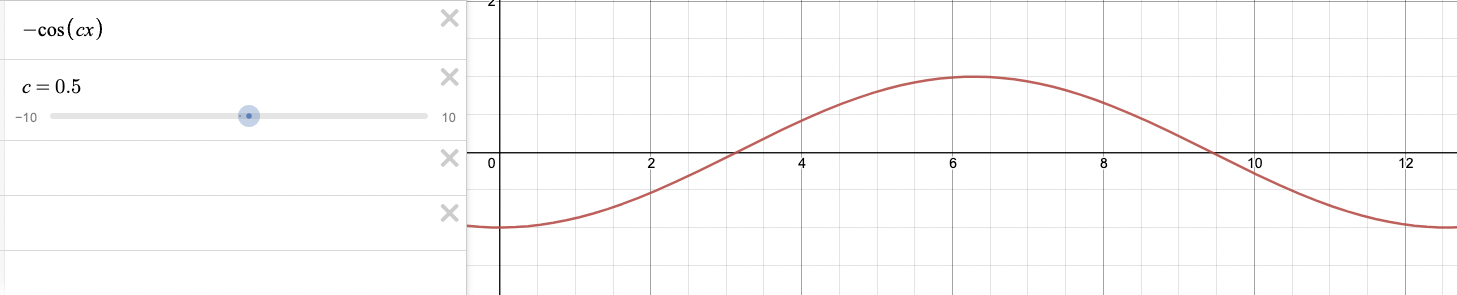

In [696]:
-np.cos(0.5*df_train.MoSold)

1     -0.070737
2     -0.540302
3     -0.708670
4      0.801144
5     -0.708670
         ...   
759    0.801144
760    0.989992
761    0.653644
762    0.936457
763    0.210796
Name: MoSold, Length: 2580, dtype: float64

In [697]:
(-np.cos(0.5*df_train.MoSold)).describe()
#after the transformation, the min is closed to -1 and the max is closed to 1

count    2580.000000
mean        0.388439
std         0.635138
min        -0.960170
25%        -0.070737
50%         0.653644
75%         0.936457
max         0.989992
Name: MoSold, dtype: float64

In [698]:
df_train.MoSold=-np.cos(0.5*df_train.MoSold)

# Encode Categoical Columns (after ensuring the dtype of those columns is string)

In [699]:
df_train=pd.get_dummies(df_train, drop_first=True)

In [700]:
df_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,Pav

# Standardization/Standard Scaling

In [701]:
standard=StandardScaler() #give each column the same range of values and centered around 0
standard.fit(df_train)
df_train=pd.DataFrame(standard.transform(df_train), index=df_train.index, columns=df_train.columns)

In [702]:
df_train

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,Pav

In [703]:
#In production, use pipeline to encode and standard scale
#pd.get_dummies(df_test)
#
#df_dummmied=pd.get_dummies()
#pipe = Pipeline(
#    [("standardize", StandardScaler()), ("df_dummmied", df_dummmied)])

# Target Transformation

<AxesSubplot:>

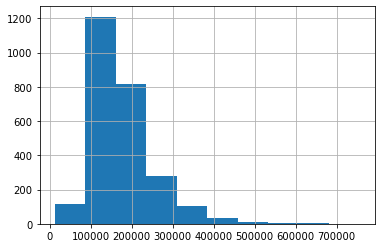

In [704]:
target.hist()
#the target Sale Price is right skewed

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


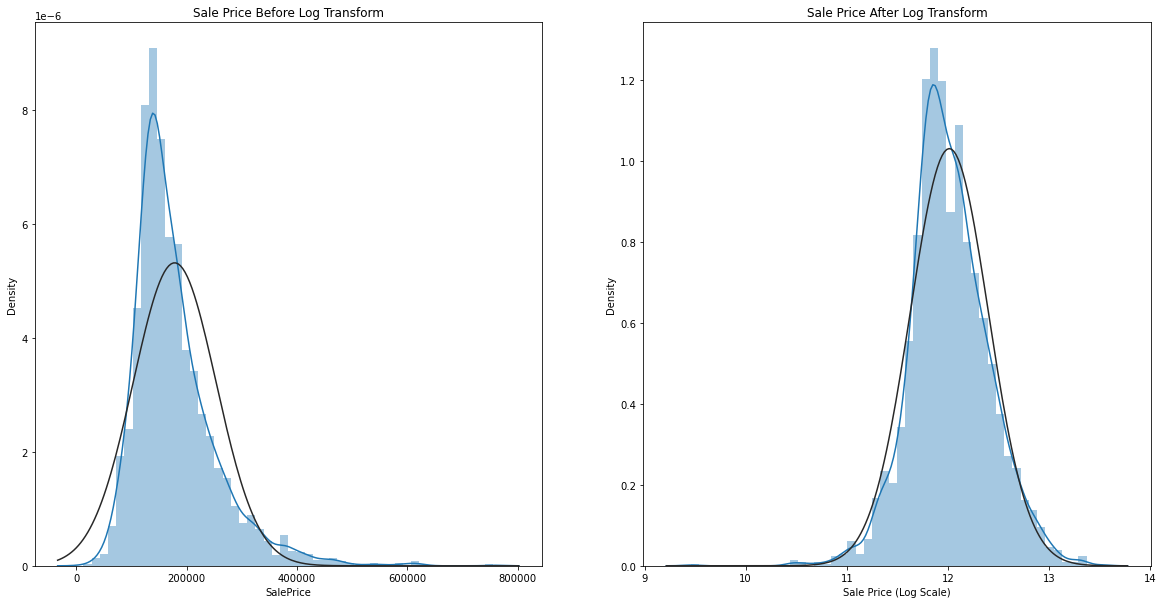

In [705]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.title("Sale Price Before Log Transform")
sns.distplot(target,fit=scipy.stats.norm)
#the data's density plot does not lie up with a normal distrubtion very well

plt.subplot(1, 2, 2)
plt.title("Sale Price After Log Transform")
sns.distplot(np.log(target),fit=scipy.stats.norm)
plt.xlabel("Sale Price (Log Scale)")
#the data's density plot fits much better with a normal distrubtion after the log transmation
plt.show()

In [706]:
log_target=np.log(target)
#We're going to predict on the log Sale Price

In [707]:
#After making prediction with our modeals, 
#we need get back to the original Sale Price by exponentiating
np.exp(log_target)

1      126000.0
2      139500.0
3      124900.0
4      114000.0
5      227000.0
         ...   
759    121000.0
760    139600.0
761    145000.0
762    217500.0
763    215000.0
Name: SalePrice, Length: 2580, dtype: float64

# Feature Selection (Forward Stepwise)

In [708]:
#write a for loop for feature selectiopn 
#or use lasso to select the features 

In [1427]:
def forward_selection(data, target, significance_level=0.05):
    import statsmodels.api as sm
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
#from here 
#https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

In [1492]:
#We tried to use the usual significance level threshold 0.05, 
# but it looks like there's still high multicollinearity in the returned features
# using a lower significance level to be more selective on the number of returned features
forward_selected_features=forward_selection(df_train, log_target, significance_level=0.001)

<ipython-input-1427-a5c72ccf8d84>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-1427-a5c72ccf8d84>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-1427-a5c72ccf8d84>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-1427-a5c72ccf8d84>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_fe

<ipython-input-1427-a5c72ccf8d84>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-1427-a5c72ccf8d84>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-1427-a5c72ccf8d84>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-1427-a5c72ccf8d84>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_fe

In [1496]:
forward_selected_features=sorted(forward_selected_features)
forward_selected_features

['BedroomAbvGr',
 'BldgType_Duplex',
 'BsmtExposure_Gd',
 'BsmtFinSF1',
 'BsmtFinType1_Unf',
 'BsmtFullBath',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'CentralAir_Y',
 'Condition1_Norm',
 'Condition1_PosN',
 'Condition2_PosN',
 'ExterCond_Fa',
 'Exterior1st_BrkFace',
 'Fireplaces',
 'Functional_Maj2',
 'Functional_Sal',
 'Functional_Typ',
 'GarageCars',
 'GarageCond_Fa',
 'GrLivArea',
 'HeatingQC_TA',
 'KitchenAbvGr',
 'LotArea',
 'MSSubClass_160',
 'MSSubClass_85',
 'MSSubClass_90',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_GrnHill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'OverallCond',
 'OverallQual',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial',
 'ScreenPorch',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

In [1497]:
len(forward_selected_features)

47

In [1500]:
df_train_final=pd.DataFrame()

In [1501]:
for feature in forward_selected_features:
    df_train_final[feature]=df_train[feature]
df_train_final.shape

(2580, 47)

In [1505]:
def get_vif(df):
    vif = pd.DataFrame()
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['variable'] = df.columns
    return vif.sort_values("VIF", ascending=False)   
#writing a function to get VIF among remaining features 
# using VIF to confirm if there's still multicollinearity exists 

In [1503]:
get_vif(df_train_final)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,variable
27,inf,MSSubClass_90
1,inf,BldgType_Duplex
3,8.625624,BsmtFinSF1
4,6.879986,BsmtFinType1_Unf
8,6.152557,BsmtQual_TA
45,5.082834,YearBuilt
7,4.175364,BsmtQual_Gd
21,3.998918,GrLivArea
39,3.465138,OverallQual
23,2.603274,KitchenAbvGr


In [1506]:
df_train_final=df_train_final.drop(["MSSubClass_90","BldgType_Duplex"], axis=1)
#Removing features with infinity VIF 

In [1507]:
get_vif(df_train_final)

,VIF,variable
2,8.584179,BsmtFinSF1
3,6.862053,BsmtFinType1_Unf
7,6.132891,BsmtQual_TA
43,5.054771,YearBuilt
6,4.169150,BsmtQual_Gd
20,3.991727,GrLivArea
37,3.453828,OverallQual
39,2.504987,SaleCondition_Normal
40,2.408729,SaleCondition_Partial
42,2.349241,TotalBsmtSF


In [1508]:
df_train_final.shape

(2580, 45)

# EDA/Multiple Linear Regression/No Train-Test-Split/No Cross Validation

In [1509]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
ols_no_transformed_feature = linear_model.LinearRegression()
ols_no_transformed_feature.fit(df_train_final,target)

LinearRegression()

In [1510]:
ols_no_transformed_feature.score(df_train_final,target)

0.8975724434224565

In [1511]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
ols = linear_model.LinearRegression()
ols.fit(df_train_final,log_target)

LinearRegression()

In [1512]:
ols.score(df_train_final,log_target)
#better prediction using the log-transformed target 

0.9334839209653204

# EDA/Multiple Linear Regression/No Cross Validation

In [1513]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_final, log_target, test_size=0.3, random_state=0)

In [1514]:
from sklearn.linear_model import LinearRegression 
ols_split = LinearRegression()
ols_split.fit(X_train, y_train)
ols_split.score(X_train, y_train)

0.9388802526472682

In [1515]:
ols_split.score(X_test, y_test)

0.9165905630146416

# EDA/Multiple Linear Regression/With 10-fold Cross Validation, Train-Test-Split

All other models will be evaulated with a 10-fold cross valdiation on the train set.

In [1516]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [1517]:
ols_split = LinearRegression()

In [1518]:
ols_split.fit(X_train, y_train)

LinearRegression()

In [1799]:
ols_split_scores = cross_val_score(ols_split, X_train, y_train, cv=kfold)
print(ols_split_scores)
np.mean(ols_split_scores)

[0.91471702 0.94718091 0.93683422 0.93448775 0.93825875 0.92274609
 0.94322181 0.95181079 0.85824165 0.93942654]


0.9286925519836752

In [1794]:
ols_split.score(X_test, y_test)

0.9165905630146416

In [1800]:
ols_split_scores = cross_val_score(ols_split, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_ols_split=np.sqrt(np.mean(-ols_split_scores))
rmse_train_ols_split

0.10179910952034496

In [1742]:
from sklearn.metrics import mean_squared_error
rmse_test_ols_split=np.sqrt(mean_squared_error(y_test, ols_split.predict(X_test)))
print(rmse_test_ols_split)
#root-means-squared error (RMSE) between the logarithm of the predicted sale price 
# and the logarithm of the actual price

0.11435924919680988


# Ridge Regression

In [1525]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge=Ridge()

In [1526]:
ridge.fit(X_train, y_train)

Ridge()

In [1530]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=kfold)
print(ridge_scores)
np.mean(ridge_scores)

[0.91470462 0.94715514 0.93687065 0.93447796 0.93830917 0.92276477
 0.94319027 0.95182673 0.85833185 0.93942123]


0.9287052396556525

In [1528]:
ridge.score(X_test, y_test)

0.9165769660574148

In [1784]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_ridge=np.sqrt(np.mean(-ridge_scores))
rmse_train_ridge

0.10174206278733379

In [1704]:
from sklearn.metrics import mean_squared_error
rmse_test_ridge=np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
print(rmse_test_ridge)

0.11436856993144011


# Lasso Regression

In [1543]:
lasso=Lasso()

In [1544]:
lasso.fit(X_train, y_train)

Lasso()

In [1545]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=kfold)
print(lasso_scores)
np.mean(lasso_scores)

[-0.00143366 -0.00381451 -0.00131371 -0.01136003 -0.00704169 -0.00722499
 -0.01182442 -0.00234145 -0.00558932 -0.00764279]


-0.005958657505404252

In [1546]:
lasso.score(X_test, y_test)

-5.0100953733256404e-05

None of these test score and train score look good. They are both worse than a null model. 

Let's tune the hyperparameters with Grid Search `GridSearchCV`

#### Tuning hyperparameters for Lasso Regression with `GridSearchCV`

In [830]:
list(np.logspace(-8,2,11))

[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

In [831]:
lasso.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [1645]:
from sklearn.model_selection import GridSearchCV

lasso_params = {
    "alpha": list(np.logspace(-8,2,11))
    ,"max_iter": [10, 100, 1000, 10000]
    , "tol": list(np.logspace(-8,0,9))
    
}

lasso_gs = GridSearchCV(lasso, lasso_params, cv=kfold)
lasso_gs.fit(X_train, y_train)
print("The best parameters are: ", lasso_gs.best_params_)
lasso_gs.cv_results_['mean_test_score']

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.112522645587971, tolerance: 2.3918595332592967e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.39998934930424, tolerance: 2.3392407912414762e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.487820879152391, tolerance: 2.4228103501482117e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Con

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.39998934930424, tolerance: 2.339240791241476
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.487820879152391, tolerance: 2.4228103501482114
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.445301457373809, tolerance: 2.414498678013581
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarnin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9150540979263706, tolerance: 0.023368859942502828
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1608562541172578, tolerance: 0.024047910574839054
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18425059829040435, tolerance: 0.023791786582089657
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Conv

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.472907393751259, tolerance: 0.2401615591697264
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.112255202673333, tolerance: 2.3918595332592965
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.399625793826985, tolerance: 2.339240791241476
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.109579139783598, tolerance: 2.3918595332592967e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.39598789490318, tolerance: 2.3392407912414762e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.484284333355037, tolerance: 2.4228103501482117e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Con

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.39598789490318, tolerance: 2.339240791241476
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.484284333355037, tolerance: 2.4228103501482114
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.4421798051518495, tolerance: 2.414498678013581
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarni

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.082654749790986, tolerance: 2.3918595332592967e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.3593737938200405, tolerance: 2.3392407912414762e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.45193565118276, tolerance: 2.4228103501482117e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Co

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.0475859403851615, tolerance: 2.336885994250283
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.468894960935776, tolerance: 2.404791057483905
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.522450973880022, tolerance: 2.3791786582089656
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6257196861663665, tolerance: 2.336885994250283
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.056685741894132, tolerance: 2.404791057483905
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.145631913394295, tolerance: 2.3791786582089656
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.611362073407694, tolerance: 2.4228103501482114
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.521226193617498, tolerance: 2.414498678013581
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.312298748842691, tolerance: 2.399292228229905
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarni

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028094007867935034, tolerance: 2.3918595332592967e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0265285284116743, tolerance: 2.3392407912414762e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028517735148767542, tolerance: 2.4228103501482117e-06
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:

The best parameters are:  {'alpha': 0.0001, 'max_iter': 1000, 'tol': 1e-08}


array([ 0.92766955,  0.92766955,  0.92766955,  0.92766955,  0.92766955,
        0.92766955,  0.92766955,  0.9253005 ,  0.79163861,  0.92869255,
        0.92869255,  0.92869255,  0.92869255,  0.92869255,  0.92869255,
        0.92869255,  0.9253005 ,  0.79163861,  0.92869255,  0.92869255,
        0.92869255,  0.92869255,  0.92869255,  0.92869255,  0.92869255,
        0.9253005 ,  0.79163861,  0.92869255,  0.92869255,  0.92869255,
        0.92869255,  0.92869255,  0.92869255,  0.92869255,  0.9253005 ,
        0.79163861,  0.92766958,  0.92766958,  0.92766958,  0.92766958,
        0.92766958,  0.92766958,  0.92766958,  0.92530058,  0.79163916,
        0.92869257,  0.92869257,  0.92869257,  0.92869257,  0.92869257,
        0.92869256,  0.92869256,  0.92530058,  0.79163916,  0.92869257,
        0.92869257,  0.92869257,  0.92869257,  0.92869257,  0.92869256,
        0.92869256,  0.92530058,  0.79163916,  0.92869257,  0.92869257,
        0.92869257,  0.92869257,  0.92869257,  0.92869256,  0.92

In [1673]:
lasso_gs.score(X_test, y_test)

0.9165392861946019

#### Tuning hyperparameters for Lasso Regression with `Optuna`
Optuna employs a Bayesian optimization algorithm https://tech.preferred.jp/en/blog/optuna-release/

In [ ]:
#!pip install optuna

In [953]:
lasso.get_params()

{'alpha': 0.001,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [1555]:
import optuna

def lasso_objective(trial):
    max_iter = trial.suggest_int("max_iter", 1000, 1000000)
    tol = trial.suggest_loguniform('tol', 0.00001, 1.0)
    alpha = trial.suggest_loguniform('alpha', 1e-8, 10)    
    
    model = Lasso(
        max_iter=max_iter,
        tol=tol,
        alpha=alpha,
    )
    
    model.fit(X_train, y_train)
    rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    
    return np.mean(rmse_train)

In [1556]:
lasso_study = optuna.create_study(direction="minimize")
lasso_study.optimize(lasso_objective, n_trials=100)

[I 2021-11-23 15:24:24,728] A new study created in memory with name: no-name-109bee5a-6a96-438b-98dd-193f4e9fc3bb
[I 2021-11-23 15:24:24,792] Trial 0 finished with value: 1.1204085680306688 and parameters: {'max_iter': 180679, 'tol': 0.16803356794542523, 'alpha': 3.500064298683768e-07}. Best is trial 0 with value: 1.1204085680306688.
[I 2021-11-23 15:24:24,830] Trial 1 finished with value: 1.12184028577989 and parameters: {'max_iter': 618523, 'tol': 0.17782200829611394, 'alpha': 4.653479880580933e-08}. Best is trial 0 with value: 1.1204085680306688.
[I 2021-11-23 15:24:24,861] Trial 2 finished with value: 1.163061255640148 and parameters: {'max_iter': 951889, 'tol': 0.9268575903991911, 'alpha': 8.651075174902484e-08}. Best is trial 0 with value: 1.1204085680306688.
[I 2021-11-23 15:24:24,891] Trial 3 finished with value: 1.4671825198275195 and parameters: {'max_iter': 331830, 'tol': 0.46357198482393336, 'alpha': 9.416272926038086}. Best is trial 0 with value: 1.1204085680306688.
[I 202

[I 2021-11-23 15:24:26,178] Trial 35 finished with value: 1.1217939873364395 and parameters: {'max_iter': 652729, 'tol': 0.1876793323554118, 'alpha': 2.095706222435051e-05}. Best is trial 18 with value: 1.1059273835520242.
[I 2021-11-23 15:24:26,220] Trial 36 finished with value: 1.109138925754712 and parameters: {'max_iter': 943296, 'tol': 0.1155582529822225, 'alpha': 0.0002178391257184866}. Best is trial 18 with value: 1.1059273835520242.
[I 2021-11-23 15:24:26,258] Trial 37 finished with value: 1.1318826351925233 and parameters: {'max_iter': 966212, 'tol': 0.21393477189899784, 'alpha': 0.0006152472840178764}. Best is trial 18 with value: 1.1059273835520242.
[I 2021-11-23 15:24:26,294] Trial 38 finished with value: 1.4671825198275195 and parameters: {'max_iter': 804681, 'tol': 0.06481225651425979, 'alpha': 0.7331487208678604}. Best is trial 18 with value: 1.1059273835520242.
[I 2021-11-23 15:24:26,333] Trial 39 finished with value: 1.1528961017647619 and parameters: {'max_iter': 5657

[I 2021-11-23 15:24:27,638] Trial 70 finished with value: 1.1059153557783374 and parameters: {'max_iter': 458257, 'tol': 0.0007422642494895708, 'alpha': 1.5201469709366983e-05}. Best is trial 70 with value: 1.1059153557783374.
[I 2021-11-23 15:24:27,681] Trial 71 finished with value: 1.1065210823969776 and parameters: {'max_iter': 436604, 'tol': 0.03349679256993502, 'alpha': 9.269035656630928e-06}. Best is trial 70 with value: 1.1059153557783374.
[I 2021-11-23 15:24:27,737] Trial 72 finished with value: 1.1059173916109386 and parameters: {'max_iter': 278597, 'tol': 0.006923685809238854, 'alpha': 3.103636921552317e-05}. Best is trial 70 with value: 1.1059153557783374.
[I 2021-11-23 15:24:27,817] Trial 73 finished with value: 1.1059158848661377 and parameters: {'max_iter': 272398, 'tol': 0.0011966275722980306, 'alpha': 9.260489552954263e-07}. Best is trial 70 with value: 1.1059153557783374.
[I 2021-11-23 15:24:27,859] Trial 74 finished with value: 1.1072306788838389 and parameters: {'max

In [1557]:
lasso_study.best_params

{'max_iter': 458257,
 'tol': 0.0007422642494895708,
 'alpha': 1.5201469709366983e-05}

In [1558]:
lasso_tuned=Lasso(max_iter=458257, 
                  tol=0.0007422642494895708, 
                  alpha=1.5201469709366983e-05)

In [1559]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=1.5201469709366983e-05, max_iter=458257, tol=0.0007422642494895708)

In [1560]:
lasso_tuned_scores = cross_val_score(lasso_tuned, X_train, y_train, cv=kfold)
print(lasso_tuned_scores)
np.mean(lasso_tuned_scores)

[0.91470052 0.94716466 0.93685489 0.93450692 0.93825252 0.92272882
 0.94321811 0.95181966 0.85826318 0.93943228]


0.9286941570243805

In [1561]:
lasso_tuned.score(X_test, y_test)

0.916581272631664

The test score of the model using Optuna's hyperparameters is slightly better than the test score from GridSearchCV (i.e. 0.9165392861946019). 

It also took less time. We'll go with the hyperparameters tuned with Optuna

In [1785]:
lasso_tuned_scores = cross_val_score(lasso_tuned, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_lasso=np.sqrt(np.mean(-lasso_tuned_scores))
rmse_train_lasso

0.10179608473657481

In [1701]:
from sklearn.metrics import mean_squared_error
rmse_test_lasso=np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))
print(rmse_test_lasso)

0.11439439556569979


# Non-Linear Models

## Random Forest

In [993]:
from sklearn.ensemble import RandomForestRegressor

In [1566]:
rf=RandomForestRegressor(random_state=0)

In [1567]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [1570]:
rf_scores = cross_val_score(rf, X_train, y_train, cv=kfold)
print(rf_scores)
np.mean(rf_scores)

[0.85019612 0.8850932  0.92067275 0.91362695 0.88345987 0.87361592
 0.91450079 0.91695411 0.84059121 0.91735104]


0.8916061963285203

In [1573]:
rf.score(X_test, y_test)

0.8883612191113028

#### Tuning hyperparameters for Random Forest

In [1018]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [1752]:
import optuna

def rf_objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 100)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    
    model = RandomForestRegressor(
        max_depth=max_depth,
        n_estimators=n_estimators,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    
    model.fit(X_train, y_train)
    rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    
    return np.mean(rmse_train)

In [1753]:
rf_study = optuna.create_study(direction="minimize")
rf_study.optimize(rf_objective, n_trials=100)

[I 2021-11-24 06:21:03,007] A new study created in memory with name: no-name-f6d943d2-12b6-4b48-b2ec-745dc9b38b7d
[I 2021-11-24 06:21:17,005] Trial 0 finished with value: 0.13080472781916969 and parameters: {'max_depth': 9, 'n_estimators': 318, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.13080472781916969.
[I 2021-11-24 06:21:53,217] Trial 1 finished with value: 0.12669759200288908 and parameters: {'max_depth': 40, 'n_estimators': 698, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.12669759200288908.
[I 2021-11-24 06:22:06,253] Trial 2 finished with value: 0.13979941115656797 and parameters: {'max_depth': 87, 'n_estimators': 344, 'min_samples_leaf': 14}. Best is trial 1 with value: 0.12669759200288908.
[I 2021-11-24 06:22:27,101] Trial 3 finished with value: 0.14431902761863097 and parameters: {'max_depth': 96, 'n_estimators': 595, 'min_samples_leaf': 19}. Best is trial 1 with value: 0.12669759200288908.
[I 2021-11-24 06:22:35,756] Trial 4 finished with value: 0.145411

[I 2021-11-24 06:39:39,862] Trial 37 finished with value: 0.14153646052145755 and parameters: {'max_depth': 69, 'n_estimators': 845, 'min_samples_leaf': 16}. Best is trial 33 with value: 0.12421874935830499.
[I 2021-11-24 06:40:35,175] Trial 38 finished with value: 0.1252414125950631 and parameters: {'max_depth': 77, 'n_estimators': 984, 'min_samples_leaf': 3}. Best is trial 33 with value: 0.12421874935830499.
[I 2021-11-24 06:41:22,488] Trial 39 finished with value: 0.12423825265219632 and parameters: {'max_depth': 57, 'n_estimators': 754, 'min_samples_leaf': 2}. Best is trial 33 with value: 0.12421874935830499.
[I 2021-11-24 06:42:09,439] Trial 40 finished with value: 0.1242330745501937 and parameters: {'max_depth': 83, 'n_estimators': 750, 'min_samples_leaf': 2}. Best is trial 33 with value: 0.12421874935830499.
[I 2021-11-24 06:42:56,204] Trial 41 finished with value: 0.1242348737482987 and parameters: {'max_depth': 85, 'n_estimators': 744, 'min_samples_leaf': 2}. Best is trial 33 

[I 2021-11-24 07:49:43,104] Trial 75 finished with value: 0.12429405690706041 and parameters: {'max_depth': 70, 'n_estimators': 820, 'min_samples_leaf': 2}. Best is trial 46 with value: 0.12420230766194658.
[I 2021-11-24 07:50:11,269] Trial 76 finished with value: 0.14064674142387396 and parameters: {'max_depth': 62, 'n_estimators': 748, 'min_samples_leaf': 15}. Best is trial 46 with value: 0.12420230766194658.
[I 2021-11-24 07:50:55,902] Trial 77 finished with value: 0.1242304336076113 and parameters: {'max_depth': 57, 'n_estimators': 711, 'min_samples_leaf': 2}. Best is trial 46 with value: 0.12420230766194658.
[I 2021-11-24 07:51:06,555] Trial 78 finished with value: 0.12686716669616727 and parameters: {'max_depth': 36, 'n_estimators': 205, 'min_samples_leaf': 4}. Best is trial 46 with value: 0.12420230766194658.
[I 2021-11-24 07:52:13,672] Trial 79 finished with value: 0.1243457302232172 and parameters: {'max_depth': 88, 'n_estimators': 863, 'min_samples_leaf': 1}. Best is trial 46

In [1754]:
rf_study.best_params

{'max_depth': 55, 'n_estimators': 717, 'min_samples_leaf': 2}

In [1755]:
rf_tuned=RandomForestRegressor(max_depth=55, 
                              n_estimators=717,
                               min_samples_leaf=2,
                              random_state=0)

Using Grid Search to tune the hyperparameter "max_features" in this random forest model

In [1756]:
rf_params = {
    "max_features":["auto", None, "sqrt", "log2", 0.7, 0.2]
}

rf_tuned = GridSearchCV(rf_tuned, rf_params, cv=kfold, scoring="neg_mean_squared_error")
rf_tuned.fit(X_train, y_train)
print("The best parameters are: ", rf_tuned.best_params_)

The best parameters are:  {'max_features': 0.2}


In [1896]:
rf_tuned=RandomForestRegressor(max_depth=55, 
                              n_estimators=717,
                               min_samples_leaf=2,
                               max_features=0.2,
                              random_state=0
                              )

In [1897]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=55, max_features=0.2, min_samples_leaf=2,
                      n_estimators=717, random_state=0)

In [1898]:
rf_tuned_scores = cross_val_score(rf_tuned, X_train, y_train, cv=kfold)
print(rf_tuned_scores)
np.mean(rf_tuned_scores)

[0.87788048 0.88125155 0.91703811 0.92106847 0.90987773 0.88172103
 0.91687476 0.92321456 0.85975267 0.91585688]


0.9004536232155056

In [1900]:
rf_tuned.score(X_test, y_test)

0.88238988866712

In [1786]:
rf_tuned_scores = cross_val_score(rf_tuned, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_rf=np.sqrt(np.mean(-rf_tuned_scores))
rmse_train_rf

0.12126713465742041

In [1762]:
from sklearn.metrics import mean_squared_error
rmse_test_rf=np.sqrt(mean_squared_error(y_test, rf_tuned.predict(X_test)))
print(rmse_test_rf)

0.13579570405668565


### Feature Importace - Random Forest

In [1830]:
feature_importances_rf = pd.Series(rf_tuned.feature_importances_, index=df_train_final.columns).sort_values(ascending=False)
print(feature_importances_rf)

OverallQual              0.208682
GrLivArea                0.162797
YearBuilt                0.124808
TotalBsmtSF              0.093376
GarageCars               0.091709
YearRemodAdd             0.052178
Fireplaces               0.050448
BsmtFinSF1               0.042922
LotArea                  0.034534
OverallCond              0.017998
BsmtQual_TA              0.016498
CentralAir_Y             0.016234
BsmtQual_Gd              0.014170
BedroomAbvGr             0.011360
MSZoning_RM              0.007612
HeatingQC_TA             0.006726
Neighborhood_NridgHt     0.006261
BsmtFullBath             0.005674
BsmtExposure_Gd          0.004446
Neighborhood_NoRidge     0.003464
Neighborhood_Crawfor     0.002940
BsmtFinType1_Unf         0.002772
ExterCond_Fa             0.002434
ScreenPorch              0.002303
Condition1_Norm          0.001960
MSSubClass_160           0.001692
Neighborhood_Edwards     0.001629
Functional_Typ           0.001613
BsmtQual_Fa              0.001446
GarageCond_Fa 

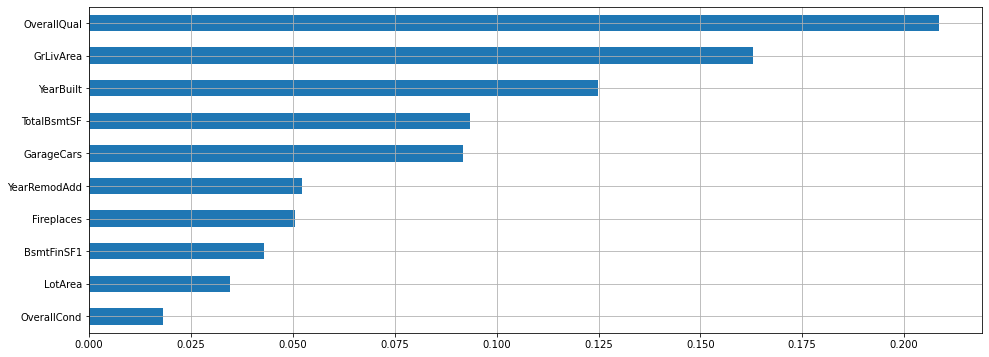

In [1851]:
feature_importances_rf.head(10).plot(kind='barh', figsize=(16,6), grid=True).invert_yaxis()

Combine the categorical features into one feature importance so that you don't have to worry about that you encoded before

In [1815]:
rf_tuned.feature_importances_.max() #use this to decide what the limit for x-axis in the plot will be 

0.20868236322925224

In [1863]:
# Create function to combine feature importances
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.1, width=10, summarized_columns=None):  
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    results = pd.Series(feature_dict, index=feature_dict.keys())
    results = results.sort_values(ascending=False)
    print(results)
    results.head(10).plot(kind='barh', figsize=(16,6), grid=True).invert_yaxis()

OverallQual      0.208682
GrLivArea        0.162797
YearBuilt        0.124808
TotalBsmtSF      0.093376
GarageCars       0.091709
YearRemodAdd     0.052178
Fireplaces       0.050448
BsmtFinSF1       0.042922
LotArea          0.034534
BsmtQual         0.032114
OverallCond      0.017998
Neighborhood     0.016299
CentralAir       0.016234
BedroomAbvGr     0.011360
MSZoning         0.008830
Heating          0.006726
BsmtFullBath     0.005674
BsmtExposure     0.004446
BsmtFinType1     0.002772
ExterCond        0.002434
ScreenPorch      0.002303
Condition1       0.002093
SaleCondition    0.002021
MSSubClass       0.001901
Functional       0.001645
GarageCond       0.001384
KitchenAbvGr     0.001256
Exterior1st      0.000978
Condition2       0.000076
SaleType         0.000000
MiscFeature      0.000000
Fence            0.000000
PoolQC           0.000000
PavedDrive       0.000000
HeatingQC        0.000000
GarageQual       0.000000
GarageFinish     0.000000
GarageType       0.000000
FireplaceQu 

Text(0.5, 1.0, 'test title')

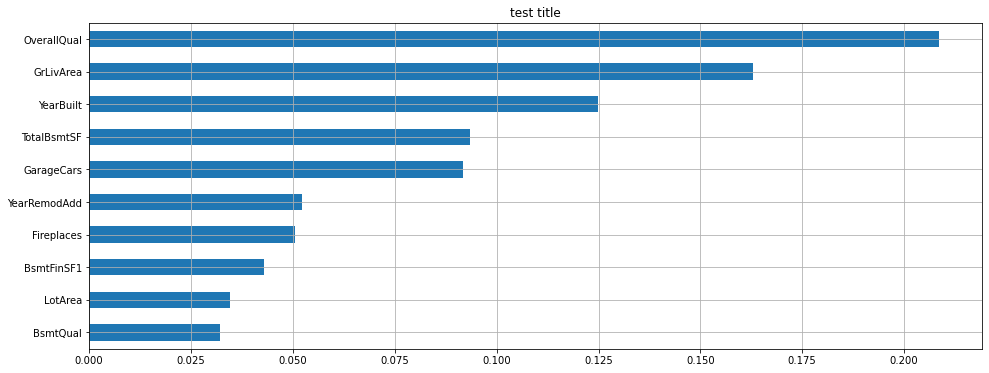

In [1881]:
# Create combined feature importances
graph_feature_importances(rf_tuned, df_train_final.columns, summarized_columns=categorical_variables)
plt.title("test title")

## XG Boost

In [1584]:
from xgboost import XGBRegressor

In [1585]:
xgb=XGBRegressor(random_state=0)

In [1586]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [1588]:
xgb_scores = cross_val_score(xgb, X_train, y_train, cv=kfold)
print(xgb_scores)
np.mean(xgb_scores)

[0.82850707 0.89944313 0.90928271 0.92166402 0.91361094 0.89037326
 0.90661528 0.88463177 0.8344708  0.91126182]


0.8899860794989033

In [1589]:
xgb.score(X_test, y_test)

0.9008114828422957

#### Tuning hyperparameters for XGBoost

In [972]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [ ]:
import optuna

def xgb_objective(trial):
    learning_rate = trial.suggest_loguniform("learning_rate", 0.00001, 0.3)
    max_depth = trial.suggest_int("max_depth", 4, 8)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    gamma = trial.suggest_loguniform("gamma", 0.00001, 3.0)    
    
    model = XGBRegressor(
        learning_rate=learning_rate,
        max_depth=max_depth,
        n_estimators=n_estimators,
        gamma=gamma,
        random_state=0
    )
    
    model.fit(X_train, y_train)
    rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    
    return np.mean(rmse_train)

In [1712]:
xgb_study = optuna.create_study(direction="minimize")
xgb_study.optimize(xgb_objective, n_trials=100)

[I 2021-11-23 20:46:22,014] A new study created in memory with name: no-name-44beac8d-6ad3-4107-980a-98de1b07a8f6
[I 2021-11-23 20:46:22,842] Trial 0 finished with value: 97714.31406401374 and parameters: {'learning_rate': 1.3102850566448397e-05, 'max_depth': 6, 'n_estimators': 196, 'gamma': 0.3929746771101201, 'random_state': '0'}. Best is trial 0 with value: 97714.31406401374.
[I 2021-11-23 20:46:23,549] Trial 1 finished with value: 98601.1463169933 and parameters: {'learning_rate': 1.053710072366931e-05, 'max_depth': 8, 'n_estimators': 169, 'gamma': 0.009114051517299455, 'random_state': '0'}. Best is trial 0 with value: 97714.31406401374.
[I 2021-11-23 20:46:25,128] Trial 2 finished with value: 95106.34707289557 and parameters: {'learning_rate': 1.2837336691350782e-05, 'max_depth': 5, 'n_estimators': 384, 'gamma': 0.00012561533929145402, 'random_state': '0'}. Best is trial 2 with value: 95106.34707289557.
[I 2021-11-23 20:46:27,582] Trial 3 finished with value: 1.1390230119920528 an

[I 2021-11-23 20:50:42,589] Trial 29 finished with value: 1.122732835069 and parameters: {'learning_rate': 0.133847052603455, 'max_depth': 5, 'n_estimators': 448, 'gamma': 5.563212724358436e-05, 'random_state': '0'}. Best is trial 25 with value: 1.117825519966644.
[I 2021-11-23 20:50:57,245] Trial 30 finished with value: 1.119741247427273 and parameters: {'learning_rate': 0.028432337058737447, 'max_depth': 6, 'n_estimators': 691, 'gamma': 0.003234974055110741, 'random_state': '0'}. Best is trial 25 with value: 1.117825519966644.
[I 2021-11-23 20:51:04,698] Trial 31 finished with value: 1.1212034209650583 and parameters: {'learning_rate': 0.0660735620772139, 'max_depth': 4, 'n_estimators': 575, 'gamma': 0.021728853747773055, 'random_state': '0'}. Best is trial 25 with value: 1.117825519966644.
[I 2021-11-23 20:51:10,726] Trial 32 finished with value: 1.1187020100969083 and parameters: {'learning_rate': 0.058606331323792026, 'max_depth': 4, 'n_estimators': 407, 'gamma': 0.003825700744438

[I 2021-11-23 20:54:26,471] Trial 58 finished with value: 2472.740001386246 and parameters: {'learning_rate': 0.0008919555251709976, 'max_depth': 4, 'n_estimators': 436, 'gamma': 0.0002677180003597467, 'random_state': '0'}. Best is trial 51 with value: 1.117448913127075.
[I 2021-11-23 20:54:35,380] Trial 59 finished with value: 1.1202843629896018 and parameters: {'learning_rate': 0.02104882496036294, 'max_depth': 5, 'n_estimators': 566, 'gamma': 0.00014491681915011282, 'random_state': '0'}. Best is trial 51 with value: 1.117448913127075.
[I 2021-11-23 20:54:40,498] Trial 60 finished with value: 1.7407070365168233 and parameters: {'learning_rate': 0.006107033663500368, 'max_depth': 4, 'n_estimators': 503, 'gamma': 0.014391451876542354, 'random_state': '0'}. Best is trial 51 with value: 1.117448913127075.
[I 2021-11-23 20:54:46,390] Trial 61 finished with value: 1.1191794933063586 and parameters: {'learning_rate': 0.0473191031695792, 'max_depth': 5, 'n_estimators': 373, 'gamma': 0.005596

[I 2021-11-23 20:58:06,946] Trial 87 finished with value: 1.11835534055386 and parameters: {'learning_rate': 0.041931777486635305, 'max_depth': 4, 'n_estimators': 614, 'gamma': 0.0012198223414226748, 'random_state': '0'}. Best is trial 51 with value: 1.117448913127075.
[I 2021-11-23 20:58:11,316] Trial 88 finished with value: 4.9424454178641835 and parameters: {'learning_rate': 0.004070892423227113, 'max_depth': 4, 'n_estimators': 487, 'gamma': 0.00042106012293839293, 'random_state': '0'}. Best is trial 51 with value: 1.117448913127075.
[I 2021-11-23 20:58:16,466] Trial 89 finished with value: 1.1348049337018102 and parameters: {'learning_rate': 0.014671000866243076, 'max_depth': 4, 'n_estimators': 399, 'gamma': 0.002297913402021111, 'random_state': '0'}. Best is trial 51 with value: 1.117448913127075.
[I 2021-11-23 20:58:23,985] Trial 90 finished with value: 1.1203896993019877 and parameters: {'learning_rate': 0.07711539855558716, 'max_depth': 4, 'n_estimators': 519, 'gamma': 0.000197

In [1715]:
xgb_study.best_params

{'learning_rate': 0.049464592706157676,
 'max_depth': 4,
 'n_estimators': 531,
 'gamma': 0.0008135486754957662,
 'random_state': '0'}

In [1716]:
xgb_tuned=XGBRegressor(learning_rate=0.049464592706157676,
                       n_estimators=531,
                       max_depth=4,
                       gamma=0.0008135486754957662,
                      random_state=0)

In [1717]:
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1,
             gamma=0.0008135486754957662, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.049464592706157676,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=531, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [1895]:
xgb_tuned_scores = cross_val_score(xgb_tuned, X_train, y_train, cv=kfold)
print(xgb_tuned_scores)
np.mean(xgb_tuned_scores)

[0.84731066 0.921331   0.92556119 0.93686244 0.9479618  0.90340163
 0.9354885  0.91804754 0.87319655 0.92880063]


0.9137961939567962

In [1719]:
xgb_tuned.score(X_test, y_test)

0.913505603186164

In [1787]:
xgb_tuned_scores = cross_val_score(xgb_tuned, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_xgb=np.sqrt(np.mean(-xgb_tuned_scores))
rmse_train_xgb

0.11259370145002295

In [1720]:
from sklearn.metrics import mean_squared_error
rmse_test_xgb=np.sqrt(mean_squared_error(y_test, xgb_tuned.predict(X_test)))
print(rmse_test_xgb)

0.11645487880636082


### Feature Importance (XG Boost)

In [1858]:
xgb_tuned.feature_importances_.max() #use this to decide what the limit for x-axis in the plot will be 

0.16264483

Fireplaces       0.162645
OverallQual      0.117935
GarageCars       0.108939
GrLivArea        0.061585
TotalBsmtSF      0.060000
CentralAir       0.059264
Neighborhood     0.057949
YearBuilt        0.048722
MSZoning         0.042509
SaleCondition    0.034573
Functional       0.032113
YearRemodAdd     0.030288
BsmtExposure     0.026444
Condition1       0.020266
BsmtFinSF1       0.019840
OverallCond      0.018332
LotArea          0.012245
Exterior1st      0.011165
ScreenPorch      0.011062
Heating          0.010076
KitchenAbvGr     0.008730
ExterCond        0.008604
BsmtFullBath     0.008515
BsmtQual         0.007895
GarageCond       0.005918
BsmtFinType1     0.005169
MSSubClass       0.004858
BedroomAbvGr     0.003846
Condition2       0.000513
RoofStyle        0.000000
Electrical       0.000000
SaleType         0.000000
MiscFeature      0.000000
Fence            0.000000
PoolQC           0.000000
PavedDrive       0.000000
Street           0.000000
GarageQual       0.000000
GarageFinish

(0.0, 0.2)

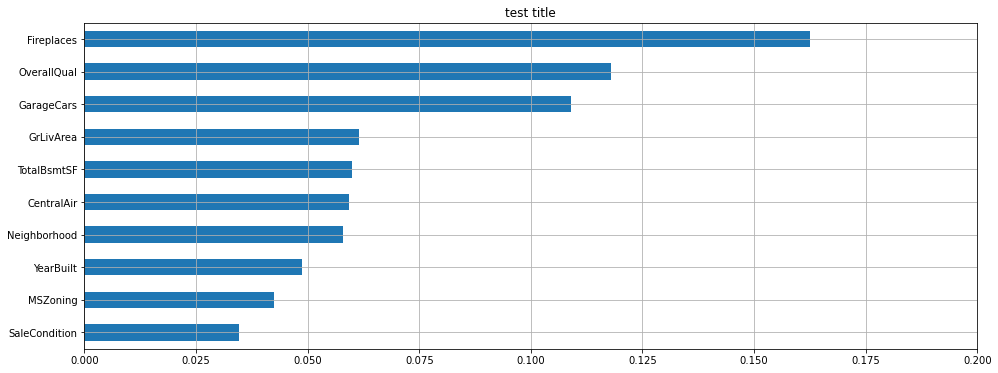

In [1861]:
# Create combined feature importances
graph_feature_importances(xgb_tuned, df_train_final.columns, summarized_columns=categorical_variables)
plt.title("test title")
plt.xlim(0, 0.2)

# CatBoost

In [840]:
from catboost import CatBoostRegressor

In [1600]:
cb=CatBoostRegressor(verbose=0, random_state=0)

In [1601]:
cb.fit(X_train, y_train)

In [1604]:
cb_scores=cross_val_score(cb, X_train, y_train, cv=kfold)
#Both training and validation were done within the training data
np.mean(cb_scores)

0.9297442821034894

In [1606]:
cb.score(X_test, y_test)

0.9204101780389007

In [1788]:
cb_scores = cross_val_score(cb, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_cb=np.sqrt(np.mean(-cb_scores))
rmse_train_cb

0.10154322661480794

In [1707]:
from sklearn.metrics import mean_squared_error
rmse_test_cb=np.sqrt(mean_squared_error(y_test, cb.predict(X_test)))
print(rmse_test_cb)

0.11171010683827937


### Feature Importances (CatBoost)

In [1883]:
cb.feature_importances_.max() #use this to decide what the limit for x-axis in the plot will be 

21.10142991996822

GrLivArea        21.101430
OverallQual      19.618631
TotalBsmtSF       9.471041
YearBuilt         8.192153
GarageCars        5.283196
Fireplaces        5.188392
BsmtFinSF1        4.902769
LotArea           4.572142
YearRemodAdd      4.435948
OverallCond       3.782992
BsmtQual          2.262256
CentralAir        1.819981
Neighborhood      1.626623
MSZoning          1.518772
BedroomAbvGr      0.977585
Condition1        0.875138
BsmtFullBath      0.747354
SaleCondition     0.690993
BsmtExposure      0.518663
Functional        0.511223
Heating           0.398304
KitchenAbvGr      0.311547
Exterior1st       0.303172
ScreenPorch       0.285325
ExterCond         0.217705
GarageCond        0.182671
MSSubClass        0.117017
Condition2        0.061201
BsmtFinType1      0.025777
GarageQual        0.000000
GarageFinish      0.000000
PavedDrive        0.000000
GarageType        0.000000
FireplaceQu       0.000000
PoolQC            0.000000
Fence             0.000000
KitchenQual       0.000000
M

Text(0.5, 0, 'Importance Score')

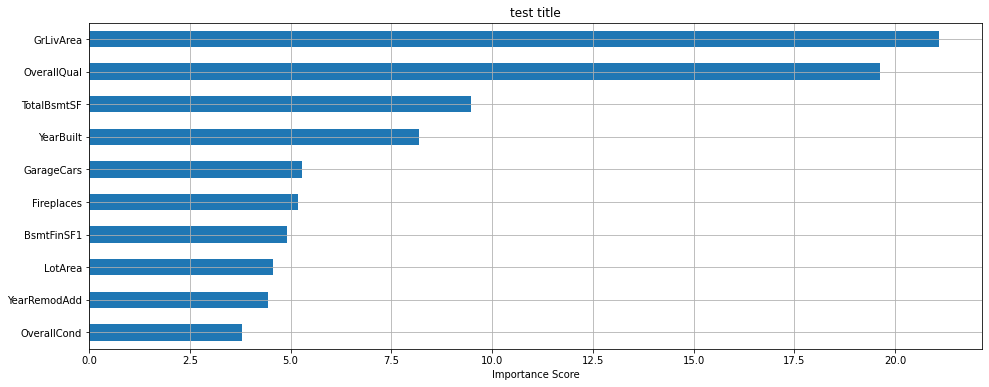

In [1886]:
# Create combined feature importances
graph_feature_importances(cb, df_train_final.columns, summarized_columns=categorical_variables)
plt.title("test title")
plt.xlabel("Importance Score")

# LightGBM Regression

In [1608]:
lgbm=LGBMRegressor(random_state=0)

In [1609]:
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=0)

In [1610]:
lgbm_scores = cross_val_score(lgbm, X_train, y_train, cv=kfold)
print(lgbm_scores)
np.mean(lgbm_scores)

[0.89133276 0.90051376 0.91871145 0.93180551 0.91564604 0.89174037
 0.92496649 0.9297908  0.87071136 0.92773488]


0.9102953415016739

In [1611]:
lgbm.score(X_test, y_test)

0.9029286917628873

In [1789]:
lgbm_scores = cross_val_score(lgbm, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_lgbm=np.sqrt(np.mean(-lgbm_scores))
rmse_train_lgbm

0.11500705005297007

In [1741]:
from sklearn.metrics import mean_squared_error
rmse_test_lgbm=np.sqrt(mean_squared_error(y_test, lgbm.predict(X_test)))
print(rmse_test_lgbm)

0.12336987988705013


There're many hyperparameters to tune for Light GBM

In [1216]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [1901]:
import optuna

def lgbm_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    learning_rate=trial.suggest_loguniform("learning_rate", 0.00001, 0.3)
    num_leaves=trial.suggest_int("num_leaves", 20, 3000)
    max_depth=trial.suggest_int("max_depth", 3, 12)
    min_data_in_leaf=trial.suggest_int("min_data_in_leaf", 200, 10000)
    max_bin=trial.suggest_int("max_bin", 200, 300)
    reg_alpha=trial.suggest_loguniform("reg_alpha", 1e-8, 1)
    reg_lambda=trial.suggest_loguniform("reg_lambda", 1e-8, 1)
    min_split_gain=trial.suggest_int("min_split_gain", 0, 15)
    #bagging_fraction=trial.suggest_loguniform("bagging_fraction", 0.2, 0.95)
    #bagging_freq=trial.suggest_categorical("bagging_freq", [1])
    feature_fraction=trial.suggest_loguniform("feature_fraction", 0.2, 0.95)
    
    model = LGBMRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        max_depth=max_depth,
        min_data_in_leaf=min_data_in_leaf,
        max_bin=max_bin,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        min_split_gain=min_split_gain,
        #bagging_fraction=bagging_fraction,
        #bagging_freq=bagging_freq,
        feature_fraction=feature_fraction
    )
    
    model.fit(X_train, y_train)
    rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    
    return np.mean(rmse_train)

### Feature importances (LightGBM Regression)

In [1888]:
lgbm.feature_importances_.max() #use this to decide what the limit for x-axis in the plot will be 

483

GrLivArea        483
LotArea          355
TotalBsmtSF      347
BsmtFinSF1       279
YearBuilt        278
YearRemodAdd     195
OverallCond      176
OverallQual      138
Neighborhood     118
BedroomAbvGr      76
GarageCars        67
SaleCondition     62
Fireplaces        47
BsmtFullBath      47
Condition1        37
CentralAir        34
Heating           34
Functional        30
BsmtQual          27
MSZoning          26
ExterCond         22
Exterior1st       21
KitchenAbvGr      20
GarageCond        20
ScreenPorch       19
MSSubClass        19
BsmtExposure      18
BsmtFinType1       5
FireplaceQu        0
GarageFinish       0
GarageQual         0
KitchenQual        0
Electrical         0
PavedDrive         0
PoolQC             0
Fence              0
MiscFeature        0
HeatingQC          0
SaleType           0
GarageType         0
Foundation         0
BsmtFinType2       0
LandSlope          0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities    

Text(0.5, 0, 'Importance Score')

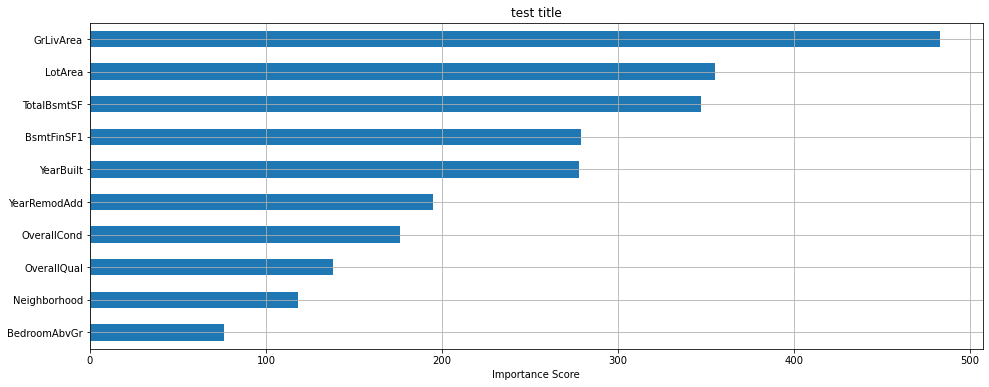

In [1889]:
# Create combined feature importances
graph_feature_importances(lgbm, df_train_final.columns, summarized_columns=categorical_variables)
plt.title("test title")
plt.xlabel("Importance Score")

## Gradient Boosting Regressor/GBM

In [973]:
from sklearn.ensemble import GradientBoostingRegressor

In [1618]:
gbm=GradientBoostingRegressor(random_state=0)

In [1619]:
gbm.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [1621]:
gbm_scores = cross_val_score(gbm, X_train, y_train, cv=kfold)
print(gbm_scores)
np.mean(gbm_scores)

[0.88920725 0.90248379 0.92188053 0.93080488 0.92285456 0.90024037
 0.92972349 0.92418489 0.84208789 0.91884278]


0.9082310419703609

In [1622]:
gbm.score(X_test, y_test)

0.908768655400181

#### Tuning hyperparameters for Gradient Boosting Regressor/GBM

In [981]:
gbm.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [1772]:
import optuna

def gbm_objective(trial):
    learning_rate = trial.suggest_loguniform("learning_rate", 0.05, 0.2)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 4, 10)
    
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=0
    )
    
    model.fit(X_train, y_train)
    rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    
    return np.mean(rmse_train)

In [1773]:
gbm_study = optuna.create_study(direction="minimize")
gbm_study.optimize(gbm_objective, n_trials=100)

[I 2021-11-24 08:31:55,039] A new study created in memory with name: no-name-96574958-0086-407f-8a75-9167c689c0d4
[I 2021-11-24 08:32:10,819] Trial 0 finished with value: 0.11613353918930971 and parameters: {'learning_rate': 0.06459159821782505, 'n_estimators': 317, 'max_depth': 6}. Best is trial 0 with value: 0.11613353918930971.
[I 2021-11-24 08:32:35,925] Trial 1 finished with value: 0.1239661049461018 and parameters: {'learning_rate': 0.1488161788454236, 'n_estimators': 434, 'max_depth': 7}. Best is trial 0 with value: 0.11613353918930971.
[I 2021-11-24 08:33:30,359] Trial 2 finished with value: 0.12259156062287087 and parameters: {'learning_rate': 0.07950145384269947, 'n_estimators': 947, 'max_depth': 7}. Best is trial 0 with value: 0.11613353918930971.
[I 2021-11-24 08:33:39,952] Trial 3 finished with value: 0.11157027193102645 and parameters: {'learning_rate': 0.12507508237167905, 'n_estimators': 278, 'max_depth': 4}. Best is trial 3 with value: 0.11157027193102645.
[I 2021-11-2

[I 2021-11-24 08:45:57,626] Trial 35 finished with value: 0.11345686713017056 and parameters: {'learning_rate': 0.07289064597175714, 'n_estimators': 372, 'max_depth': 4}. Best is trial 3 with value: 0.11157027193102645.
[I 2021-11-24 08:46:14,154] Trial 36 finished with value: 0.11206824216428764 and parameters: {'learning_rate': 0.06184650954631944, 'n_estimators': 484, 'max_depth': 4}. Best is trial 3 with value: 0.11157027193102645.
[I 2021-11-24 08:46:30,183] Trial 37 finished with value: 0.11277104392121791 and parameters: {'learning_rate': 0.059576453525094865, 'n_estimators': 476, 'max_depth': 4}. Best is trial 3 with value: 0.11157027193102645.
[I 2021-11-24 08:46:46,432] Trial 38 finished with value: 0.1119084326563263 and parameters: {'learning_rate': 0.05854807700685821, 'n_estimators': 476, 'max_depth': 4}. Best is trial 3 with value: 0.11157027193102645.
[I 2021-11-24 08:46:59,578] Trial 39 finished with value: 0.11322803970287584 and parameters: {'learning_rate': 0.055826

[I 2021-11-24 08:59:06,743] Trial 71 finished with value: 0.11231052656477594 and parameters: {'learning_rate': 0.10006739096435444, 'n_estimators': 255, 'max_depth': 4}. Best is trial 52 with value: 0.11116784206831554.
[I 2021-11-24 08:59:22,605] Trial 72 finished with value: 0.1131877168505886 and parameters: {'learning_rate': 0.0980503386671546, 'n_estimators': 459, 'max_depth': 4}. Best is trial 52 with value: 0.11116784206831554.
[I 2021-11-24 08:59:33,271] Trial 73 finished with value: 0.11406355125790754 and parameters: {'learning_rate': 0.08372816526058971, 'n_estimators': 312, 'max_depth': 4}. Best is trial 52 with value: 0.11116784206831554.
[I 2021-11-24 08:59:44,831] Trial 74 finished with value: 0.11311118816369745 and parameters: {'learning_rate': 0.06541014090893726, 'n_estimators': 337, 'max_depth': 4}. Best is trial 52 with value: 0.11116784206831554.
[I 2021-11-24 08:59:52,595] Trial 75 finished with value: 0.11307208575524419 and parameters: {'learning_rate': 0.0919

In [1774]:
gbm_study.best_params

{'learning_rate': 0.06346526731696268, 'n_estimators': 422, 'max_depth': 4}

In [1775]:
gbm_tuned=GradientBoostingRegressor(n_estimators=422, 
                                    learning_rate=0.06346526731696268, 
                                    max_depth=4, 
                                    random_state=0)

In [1776]:
gbm_tuned.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.06346526731696268, max_depth=4,
                          n_estimators=422, random_state=0)

In [1777]:
gbm_tuned_scores = cross_val_score(gbm_tuned, X_train, y_train, cv=kfold)
print(gbm_tuned_scores)
np.mean(gbm_tuned_scores)

[0.90485806 0.91364516 0.92487445 0.93657431 0.93946464 0.89304838
 0.9331351  0.92705453 0.84479115 0.92305969]


0.9140505454614978

In [1778]:
gbm_tuned.score(X_test, y_test)

0.915347504685868

In [1790]:
gbm_tuned_scores = cross_val_score(gbm_tuned, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_gbm=np.sqrt(np.mean(-gbm_tuned_scores))
rmse_train_gbm

0.11247470670966611

In [1779]:
from sklearn.metrics import mean_squared_error
rmse_test_gbm=np.sqrt(mean_squared_error(y_test, gbm_tuned.predict(X_test)))
print(rmse_test_gbm)

0.11520825078795939


### Feature importances (Gradient Boosting Regressor/GBM)

In [1890]:
gbm_tuned.feature_importances_.max() #use this to decide what the limit for x-axis in the plot will be 

0.44916917693790265

OverallQual      0.449169
GrLivArea        0.153888
YearBuilt        0.112853
GarageCars       0.063663
TotalBsmtSF      0.055072
Fireplaces       0.029788
BsmtFinSF1       0.025664
LotArea          0.024027
OverallCond      0.020343
YearRemodAdd     0.016484
CentralAir       0.011696
Neighborhood     0.006522
MSZoning         0.005906
SaleCondition    0.004517
BsmtQual         0.003052
BsmtFullBath     0.002980
BsmtExposure     0.002491
ExterCond        0.002096
Condition1       0.002082
Functional       0.001580
ScreenPorch      0.001138
BedroomAbvGr     0.001120
Heating          0.001111
Exterior1st      0.000954
GarageCond       0.000568
KitchenAbvGr     0.000439
MSSubClass       0.000393
Condition2       0.000238
BsmtFinType1     0.000165
GarageType       0.000000
Electrical       0.000000
KitchenQual      0.000000
FireplaceQu      0.000000
LandSlope        0.000000
GarageFinish     0.000000
HeatingQC        0.000000
PavedDrive       0.000000
PoolQC           0.000000
Fence       

Text(0.5, 1.0, 'test title')

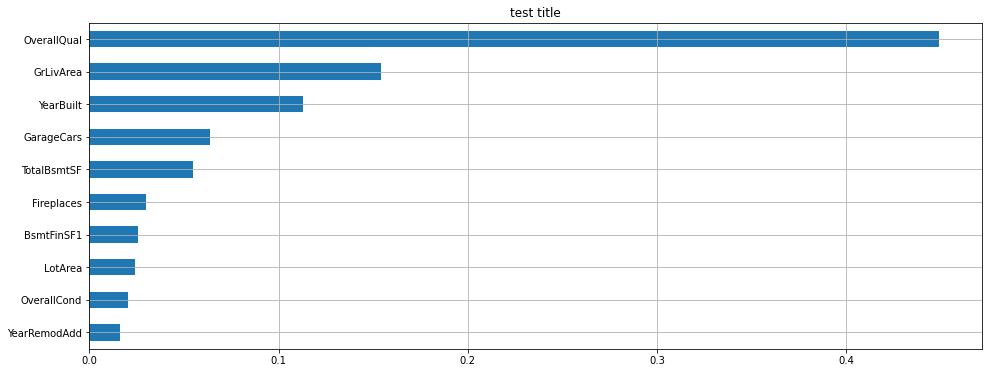

In [1891]:
# Create combined feature importances
graph_feature_importances(gbm_tuned, df_train_final.columns, summarized_columns=categorical_variables)
plt.title("test title")
#plt.xlabel("")

## SVR (Support Vector Regression) - Gaussian Kernel/RBF

In [1266]:
from sklearn.svm import SVR

In [1629]:
svr=SVR()

In [1630]:
svr.fit(X_train, y_train)

SVR()

In [1633]:
svr_scores = cross_val_score(svr, X_train, y_train, cv=kfold)
print(svr_scores)
np.mean(svr_scores)

[0.87605702 0.84262425 0.89387249 0.90362172 0.88896626 0.84762464
 0.88892629 0.89524864 0.84921636 0.92361797]


0.8809775626515298

In [1635]:
svr.score(X_test, y_test)

0.8548196518465213

#### Tuning hyperparameters for SVR (Support Vector Regression)

In [1277]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [1284]:
import optuna

def svr_objective(trial):
    C = trial.suggest_int("C", 1, 1000)
    gamma = trial.suggest_loguniform("gamma", 0.0001, 0.001)
    kernel = trial.suggest_categorical('kernel', ['rbf'])
    
    model = SVR(
        C = C,
        gamma = gamma,
        kernel = kernel,
    )
    
    model.fit(X_train, y_train)
    rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    
    return np.mean(rmse_train)

In [1285]:
svr_study = optuna.create_study(direction="minimize")
svr_study.optimize(svr_objective, n_trials=100)

[I 2021-11-22 21:18:39,314] A new study created in memory with name: no-name-3261e78a-99e2-4c9e-8245-59b6c30d0c44
[I 2021-11-22 21:18:40,157] Trial 0 finished with value: 1.1113186081083026 and parameters: {'C': 85, 'gamma': 0.00035163200219766647, 'kernel': 'rbf'}. Best is trial 0 with value: 1.1113186081083026.
[I 2021-11-22 21:18:40,852] Trial 1 finished with value: 1.1072495183931017 and parameters: {'C': 58, 'gamma': 0.0003475463921179639, 'kernel': 'rbf'}. Best is trial 1 with value: 1.1072495183931017.
[I 2021-11-22 21:18:43,832] Trial 2 finished with value: 1.116675873433207 and parameters: {'C': 642, 'gamma': 0.0006117304667592564, 'kernel': 'rbf'}. Best is trial 1 with value: 1.1072495183931017.
[I 2021-11-22 21:18:46,066] Trial 3 finished with value: 1.1169202907143574 and parameters: {'C': 291, 'gamma': 0.0009053982992877308, 'kernel': 'rbf'}. Best is trial 1 with value: 1.1072495183931017.
[I 2021-11-22 21:18:50,093] Trial 4 finished with value: 1.118474592008983 and param

[I 2021-11-22 21:19:39,914] Trial 38 finished with value: 1.1073672908291667 and parameters: {'C': 476, 'gamma': 0.00016702916669315314, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658157426781.
[I 2021-11-22 21:19:41,390] Trial 39 finished with value: 1.114039781075099 and parameters: {'C': 357, 'gamma': 0.00030283536977814614, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658157426781.
[I 2021-11-22 21:19:42,967] Trial 40 finished with value: 1.1060883500292014 and parameters: {'C': 246, 'gamma': 0.0005593719385414829, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658157426781.
[I 2021-11-22 21:19:43,745] Trial 41 finished with value: 1.1099457895809648 and parameters: {'C': 156, 'gamma': 0.00014884183917776483, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658157426781.
[I 2021-11-22 21:19:44,807] Trial 42 finished with value: 1.108541449784377 and parameters: {'C': 208, 'gamma': 0.00021331176736635383, 'kernel': 'rbf'}. Best is trial 36 with value: 1.10365

[I 2021-11-22 21:20:34,657] Trial 77 finished with value: 1.106310904184601 and parameters: {'C': 288, 'gamma': 0.00024362651929197318, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658157426781.
[I 2021-11-22 21:20:35,200] Trial 78 finished with value: 1.1092809247715287 and parameters: {'C': 31, 'gamma': 0.00012890192760375933, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658157426781.
[I 2021-11-22 21:20:35,977] Trial 79 finished with value: 1.1068750320255725 and parameters: {'C': 94, 'gamma': 0.00027068092998714825, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658157426781.
[I 2021-11-22 21:20:37,735] Trial 80 finished with value: 1.1093223703051232 and parameters: {'C': 653, 'gamma': 0.00020359218904242538, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658157426781.
[I 2021-11-22 21:20:38,512] Trial 81 finished with value: 1.1093163407955382 and parameters: {'C': 154, 'gamma': 0.0001695966334954896, 'kernel': 'rbf'}. Best is trial 36 with value: 1.103658

In [1287]:
svr_study.best_params

{'C': 344, 'gamma': 0.00016926861533167969, 'kernel': 'rbf'}

In [1765]:
svr_tuned=SVR(C=344, gamma=0.00016926861533167969, kernel='rbf')

In [1766]:
svr_tuned.fit(X_train, y_train)

SVR(C=344, gamma=0.00016926861533167969)

In [1769]:
svr_tuned_scores = cross_val_score(svr_tuned, X_train, y_train, cv=kfold)
print(svr_tuned_scores)
np.mean(svr_tuned_scores)

[0.92546795 0.93979576 0.93518851 0.9336604  0.94351043 0.89824187
 0.9486984  0.95436971 0.88678526 0.94320915]


0.9308927435467179

In [1770]:
svr_tuned.score(X_test, y_test)

0.9233793875005103

In [1791]:
svr_tuned_scores = cross_val_score(svr_tuned, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_svr=np.sqrt(np.mean(-svr_tuned_scores))
rmse_train_svr

0.10081650957522902

In [1771]:
from sklearn.metrics import mean_squared_error
rmse_test_svr=np.sqrt(mean_squared_error(y_test, svr_tuned.predict(X_test)))
print(rmse_test_svr)

0.1096065505647768


## SVR (Support Vector Regression) - Linear Kernel

A degree of 1 was suggested when tuning the hyperparameters for SVR with polynomial kernel and degree from 1 to 3

In [1348]:
import optuna

def svr_poly_objective(trial):
    C = trial.suggest_int("C", 1, 1000)
    kernel = trial.suggest_categorical('kernel', ['poly'])
    degree = trial.suggest_int("degree", 1, 3)
    
    model = SVR(
        C = C,
        kernel = kernel,
        degree = degree
    )
    
    model.fit(X_train, y_train)
    rmse_train = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=kfold))
    
    return np.mean(rmse_train)

In [1349]:
svr_poly_study = optuna.create_study(direction="minimize")
svr_poly_study.optimize(svr_poly_objective, n_trials=100)

[I 2021-11-23 08:18:44,728] A new study created in memory with name: no-name-5e5104da-24d4-4452-af9c-8a1ccd5ba3ea
[I 2021-11-23 08:20:02,036] Trial 0 finished with value: 1.1065967434480435 and parameters: {'C': 598, 'kernel': 'poly', 'degree': 1}. Best is trial 0 with value: 1.1065967434480435.
[I 2021-11-23 08:20:02,828] Trial 1 finished with value: 1.1974603736247738 and parameters: {'C': 483, 'kernel': 'poly', 'degree': 3}. Best is trial 0 with value: 1.1065967434480435.
[I 2021-11-23 08:34:49,518] Trial 2 finished with value: 4.801408157808707 and parameters: {'C': 309, 'kernel': 'poly', 'degree': 2}. Best is trial 0 with value: 1.1065967434480435.
[I 2021-11-23 08:34:50,373] Trial 3 finished with value: 1.1888945205244734 and parameters: {'C': 87, 'kernel': 'poly', 'degree': 3}. Best is trial 0 with value: 1.1065967434480435.
[I 2021-11-23 08:35:49,539] Trial 4 finished with value: 1.1124797016802497 and parameters: {'C': 463, 'kernel': 'poly', 'degree': 1}. Best is trial 0 with 

[I 2021-11-23 10:03:43,653] Trial 41 finished with value: 1.1119510242292143 and parameters: {'C': 657, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 10:05:04,388] Trial 42 finished with value: 1.1117703223341313 and parameters: {'C': 624, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 10:06:17,824] Trial 43 finished with value: 1.1109453447604047 and parameters: {'C': 546, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 10:07:20,529] Trial 44 finished with value: 1.110632209527655 and parameters: {'C': 498, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 10:08:16,839] Trial 45 finished with value: 1.1108475266650937 and parameters: {'C': 429, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 10:09:52,741] Trial 46 finished with value: 1.1111876234463058

[I 2021-11-23 11:10:43,799] Trial 83 finished with value: 1.1111851990976214 and parameters: {'C': 378, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 11:11:44,899] Trial 84 finished with value: 1.1100077405251176 and parameters: {'C': 440, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 11:12:47,030] Trial 85 finished with value: 1.1114031559765023 and parameters: {'C': 483, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 11:13:49,327] Trial 86 finished with value: 1.1062280069767971 and parameters: {'C': 463, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 11:14:33,483] Trial 87 finished with value: 1.1125479033288137 and parameters: {'C': 325, 'kernel': 'poly', 'degree': 1}. Best is trial 13 with value: 1.1061727212379657.
[I 2021-11-23 11:15:57,943] Trial 88 finished with value: 1.111232623274240

In [1350]:
svr_poly_study.best_params

{'C': 640, 'kernel': 'poly', 'degree': 1}

Making a SVR with a linear kernel

In [1351]:
svr_linear=SVR(kernel="linear", C=640)

In [1352]:
svr_linear.fit(X_train, y_train)

SVR(C=640, kernel='linear')

In [1353]:
svr_linear_scores = cross_val_score(svr_linear, X_train, y_train, cv=kfold)
print(svr_linear_scores)
np.mean(svr_linear_scores)

[0.91524888 0.94966349 0.92298781 0.93368959 0.87064257 0.93794485
 0.9481229  0.92459399 0.87506611 0.92734255]


0.9205302724661282

In [1354]:
svr_linear.score(X_test, y_test)

0.9184599280814021

In [1792]:
svr_linear_scores = cross_val_score(svr_linear, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
rmse_train_svr_linear=np.sqrt(np.mean(-svr_linear_scores))
rmse_train_svr_linear

0.10274238466019514

In [1355]:
from sklearn.metrics import mean_squared_error
rmse_test_svr_linear=np.sqrt(mean_squared_error(y_test, svr_linear.predict(X_test)))
print(rmse_test_svr_linear)

0.1130704825600129
